## Weather Data EDA

### Objective

* Qualitative look at the personal weather station data used to build weather models

### Rationale

* Why This?  A sense of how consistent station-to-station data is, how quicly it varies over time, and what signal and noise characteristics are import will help to reduce it properly.  Ideally, we'd like a few parameters that capture the important features and that are robust to station drop-out.  

* Why Me?  Since I will be building the weather - performance model, I am best suited to do the EDA.

* Why Now?  having some answers before we invest a lot of time in building the model will avoid re-work

### Requirements

* Pandas 0.24.2
* Matplotlib 3.1.0

### Input

* The notebook should be in the folder `'models/notebooks/eda` with the data in `models/wx_record/wx_station_by_date`

* Input files have the form `{station-id}_{mmddyy}_p01.csv` where `station-id` is a personal weather station id, e.g. KCASANFR1086, and the date is something like 033119

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Make one big dataFrame, with a station_id added from filename
wx_df = pd.DataFrame()
filenames = glob.glob('../../wx_record/wx_station_by_date/*.csv')
for filename in filenames:
    station_id = filename.split('_')[-3].split('\\')[-1]
    df_temp = pd.read_csv(filename, parse_dates=['time'])
    df_temp['station_id'] = station_id
    wx_df = wx_df.append(df_temp)
wx_df.head()

,Unnamed: 0,time,T,w_dir,w_spd,w_gust,rh,precip,station_id
0,0,2019-01-06 00:04:59,50.0,73.0,0.0,0.0,88.0,0.0,KCASANFR1086
1,1,2019-01-06 00:09:49,49.0,132.0,0.0,0.0,88.0,0.0,KCASANFR1086
2,2,2019-01-06 00:14:52,49.0,237.0,0.0,0.0,88.0,0.0,KCASANFR1086
3,3,2019-01-06 00:19:40,49.0,233.0,0.0,0.0,87.0,0.0,KCASANFR1086
4,4,2019-01-06 00:24:45,49.0,207.0,0.0,0.0,87.0,0.0,KCASANFR1086


In [38]:
wx_df['time_of_day'] = wx_df.time.dt.time
wx_df['minute_of_day'] = wx_df['time'].dt.minute + wx_df['time'].dt.hour * 60
wx_df.head()

,Unnamed: 0,time,T,w_dir,w_spd,w_gust,rh,precip,station_id,time_of_day,station_cat,seconds,minute_of_day
0,0,2019-01-06 00:04:59,50.0,73.0,0.0,0.0,88.0,0.0,KCASANFR1086,00:04:59,0,59,4
1,1,2019-01-06 00:09:49,49.0,132.0,0.0,0.0,88.0,0.0,KCASANFR1086,00:09:49,0,49,9
2,2,2019-01-06 00:14:52,49.0,237.0,0.0,0.0,88.0,0.0,KCASANFR1086,00:14:52,0,52,14
3,3,2019-01-06 00:19:40,49.0,233.0,0.0,0.0,87.0,0.0,KCASANFR1086,00:19:40,0,40,19
4,4,2019-01-06 00:24:45,49.0,207.0,0.0,0.0,87.0,0.0,KCASANFR1086,00:24:45,0,45,24


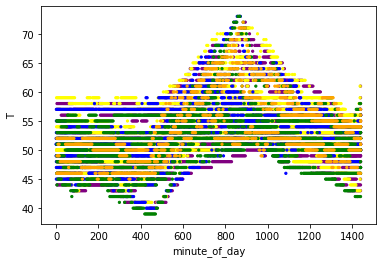

In [43]:
colorize = {0:'purple',1:'yellow',2:'blue',3:'green',4:'orange'}
color_data = [colorize[x] for x in wx_df['station_cat'].values]
wx_df.plot(kind = 'scatter', x = 'minute_of_day', y = 'T', c = color_data, marker = '.')

In [44]:
wx_resampled = wx_df.resample('15T',on='time').mean()
wx_resampled.head()

,Unnamed: 0,T,w_dir,w_spd,w_gust,rh,precip,station_cat,seconds,minute_of_day
time,,,,,,,,,,
2018-11-04 01:00:00,3.0,55.666667,240.0,0.00,5.00,93.666667,0.0,1.0,2.0,67.00
2018-11-04 01:15:00,2.5,56.000000,220.5,0.50,4.50,94.000000,0.0,1.0,2.0,79.50
2018-11-04 01:30:00,7.8,55.400000,242.0,1.20,5.80,93.800000,0.0,1.0,2.0,97.00
2018-11-04 01:45:00,9.5,55.500000,246.5,1.75,5.75,93.500000,0.0,1.0,2.0,110.75
2018-11-04 02:00:00,14.0,55.000000,253.0,3.00,10.00,94.000000,0.0,1.0,2.0,122.00


In [46]:
wx_variances = wx_df.resample('15T',on='time').std()

In [55]:
wx_variances['avg_minute_of_day'] = wx_resampled['minute_of_day']
wx_variances.head()

,Unnamed: 0,T,w_dir,w_spd,w_gust,rh,precip,station_cat,seconds,minute_of_day,avg_minute_of_day
time,,,,,,,,,,,
2018-11-04 01:00:00,4.358899,0.577350,12.124356,0.000000,3.464102,0.577350,0.0,0.0,0.0,5.000000,67.00
2018-11-04 01:15:00,0.707107,0.000000,23.334524,0.707107,0.707107,0.000000,0.0,0.0,0.0,3.535534,79.50
2018-11-04 01:30:00,3.114482,0.547723,10.677078,2.167948,1.788854,0.447214,0.0,0.0,0.0,5.000000,97.00
2018-11-04 01:45:00,3.511885,0.577350,10.661457,2.362908,4.924429,0.577350,0.0,0.0,0.0,4.787136,110.75
2018-11-04 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.00


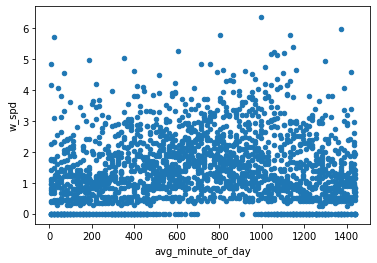

In [56]:
wx_variances.plot(kind='scatter',x='avg_minute_of_day',y='w_spd')

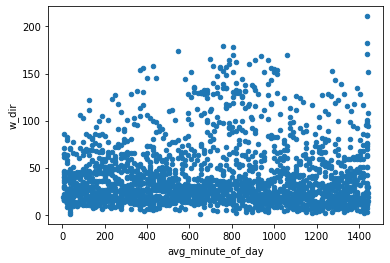

In [57]:
wx_variances.plot(kind='scatter',x='avg_minute_of_day',y='w_dir')

In [58]:
wx_0 = wx_df[wx_df.station_cat == 0]
wx_1 = wx_df[wx_df.station_cat == 1]
wx_2 = wx_df[wx_df.station_cat == 2]
wx_3 = wx_df[wx_df.station_cat == 3]
wx_4 = wx_df[wx_df.station_cat == 4]
wx_4.head()

,Unnamed: 0,time,T,w_dir,w_spd,w_gust,rh,precip,station_id,time_of_day,station_cat,seconds,minute_of_day
0,0,2019-03-03 12:29:51,52.0,225.0,1.0,2.0,96.0,0.0,KCASANFR1443,12:29:51,4,51,749
1,1,2019-03-03 12:34:55,52.0,231.0,1.0,2.0,96.0,0.0,KCASANFR1443,12:34:55,4,55,754
2,2,2019-03-03 12:39:59,52.0,232.0,2.0,3.0,96.0,0.0,KCASANFR1443,12:39:59,4,59,759
3,3,2019-03-03 12:44:48,52.0,231.0,3.0,4.0,96.0,0.0,KCASANFR1443,12:44:48,4,48,764
4,4,2019-03-03 12:49:51,52.0,236.0,2.0,3.0,96.0,0.0,KCASANFR1443,12:49:51,4,51,769


In [59]:
wx_0_r = wx_0.resample('15T',on='time').mean()
wx_1_r = wx_1.resample('15T',on='time').mean()
wx_2_r = wx_2.resample('15T',on='time').mean()
wx_3_r = wx_3.resample('15T',on='time').mean()
wx_4_r = wx_4.resample('15T',on='time').mean()

(737060, 737070)

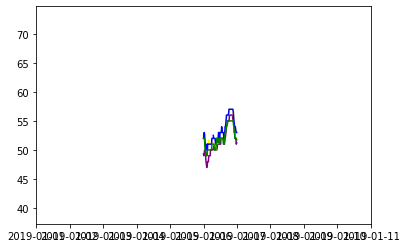

In [72]:
plt.plot(wx_0_r['T'], c = 'purple')
plt.plot(wx_1_r['T'], c = 'yellow')
plt.plot(wx_2_r['T'], c = 'blue')
plt.plot(wx_3_r['T'], c = 'green')
plt.plot(wx_4_r['T'], c = 'orange')
plt.xlim(737060, 737070)

In [66]:
left, right

(736994.9005208333, 737158.4223958334)

In [73]:
wx_deltas = pd.DataFrame()
wx_deltas['station_0'] = wx_0_r['T'] - wx_resampled['T']
wx_deltas.head()

,station_0
time,
2018-11-04 01:00:00,NaN
2018-11-04 01:15:00,NaN
2018-11-04 01:30:00,NaN
2018-11-04 01:45:00,NaN
2018-11-04 02:00:00,NaN


In [74]:
wx_deltas.station_0.mean()

-0.4237947358559194